In [1]:
from qaoa import QAOA, problems, mixers

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

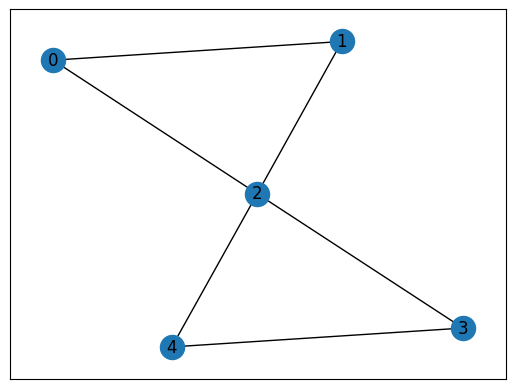

In [3]:
V = np.arange(0,5,1)
E = [(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
k_cuts=2

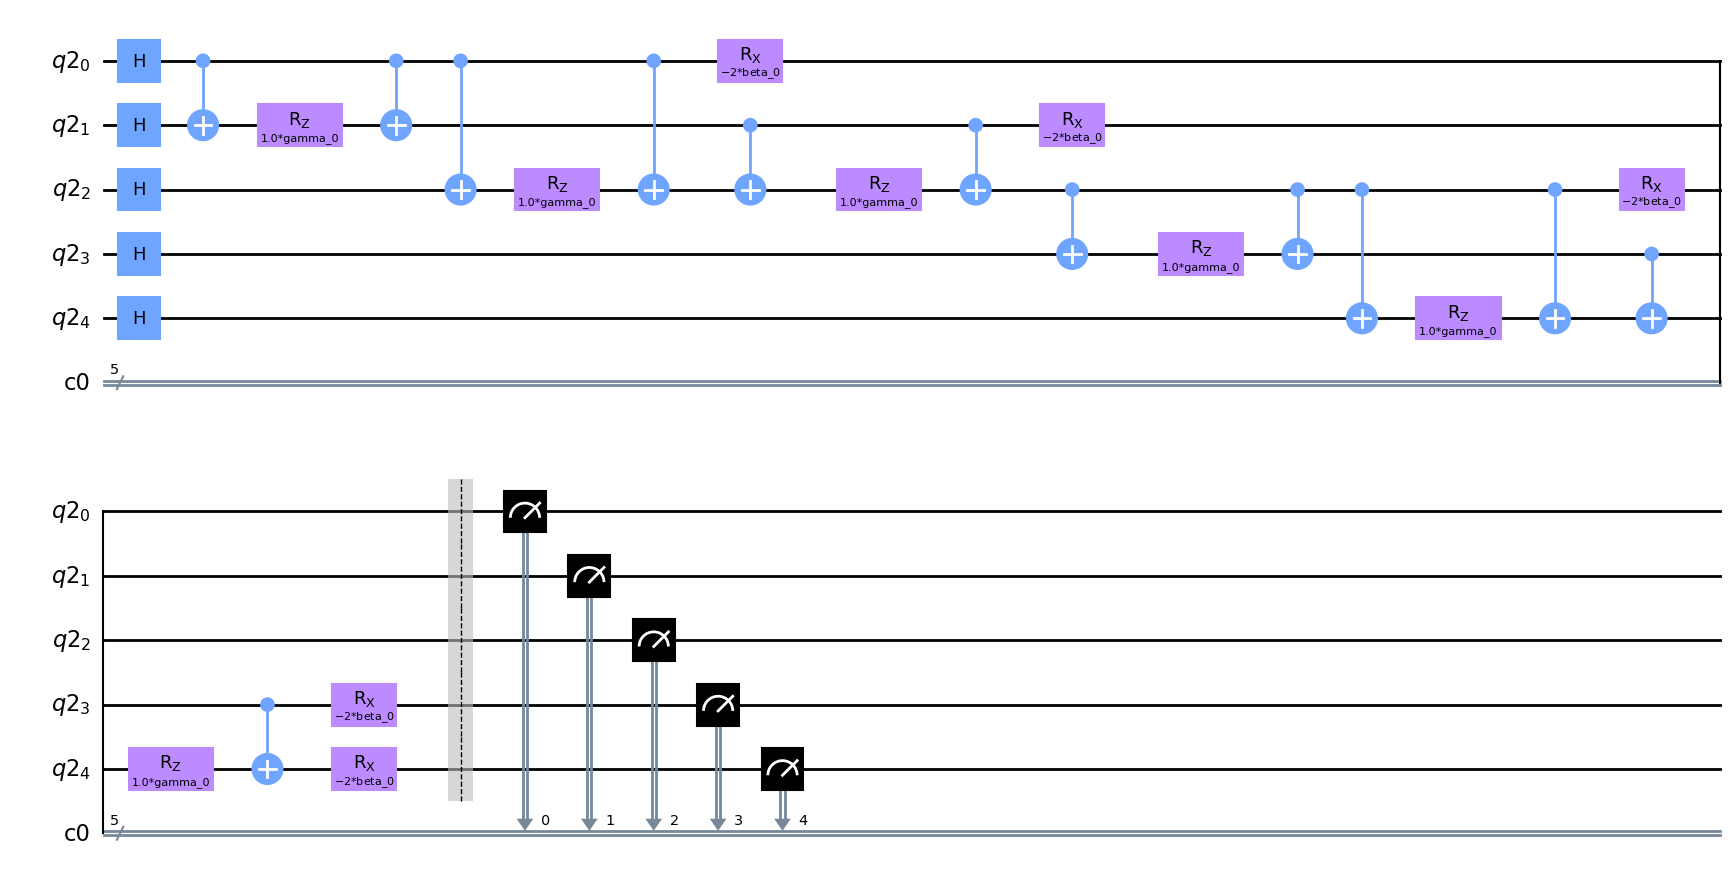

In [4]:
params = {
    'G': G,
    'shots': 2048
}
qaoamc = QAOA(
    problem=problems.MaxCut,
    mixer=mixers.Unconstrained,
    params=params
)
qaoamc.createParameterizedCircuit(1)
qaoamc.parameterized_circuit.draw('mpl')

2023-09-06 09:55:21 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 09:55:21 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 09:55:21 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 09:55:21 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 09:55:21 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-06 09:55:21 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape


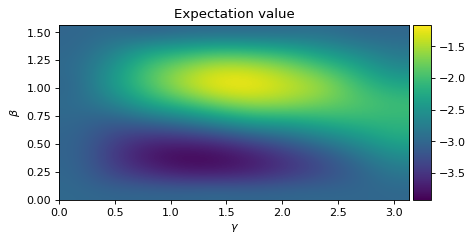

In [5]:
qaoamc.sample_cost_landscape(
    angles={
        'gamma':[0, np.pi/2, 10],
        'beta': [0, np.pi/2, 10]
    }
)

f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [6]:
qaoamc.increase_depth()
print("approximation ratio=", list(qaoamc.costval.values())[0]/-4)

cost(depth= 1 )= -3.9082031250000004
approximation ratio= 0.984375
